<a href="https://colab.research.google.com/github/15021996/IPL_DataAnalysis/blob/main/Soumya_Team_3_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

The brainchild of the Board of Control for Cricket in India (BCCI), the IPL has developed into the most lucrative and most popular outlet for the game of cricket.With successive matches, comes a lot of data in handy to be analysed and data analysis has always been giving surprising results.
And cricket, as you can imagine, is ripe with data points.

Indian cricket team relies heavily on data analytics to decide their strategy for an upcoming match? Batsmen are told where a bowler typically pitches during the death overs, bowlers are shown various visualizations to help them understand the weak spots of opposition batsmen, and so on.


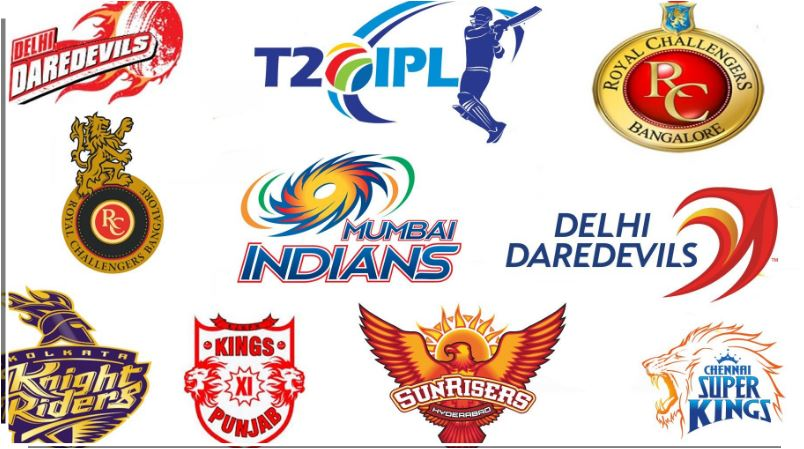

In [4]:
#Import package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
working_directory = '/content/drive/My Drive/AlmaBetter/CohortAravali/Cohort Aravali/Module 2/Capstone-1/'
matches_df = pd.read_csv(working_directory + 'matches.csv')

In [7]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
len(matches_df['id'].unique().tolist())

756

In [10]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [11]:
matches_df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


We can infer following information from the above operation describe().
1. The biggest win by runs is by 146 runs.
2. The biggest victory of the team batting second(win_by_wickets) is by 10 wickets.
3. 75% of the victorious teams that bat first won by a margin of 19 runs.
4. 75% of the victorious teams that bat second won by a margin of 6 wickets.

* To know null values in the dataframe.

In [12]:
matches_df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

1. Which city maximum matches were played?

In [13]:

matches_df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Cape Town           7
Abu Dhabi           7
Cuttack             7
Ranchi              7
Port Elizabeth      7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Nagpur              3
East London         3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

Maximun number of matches were played in Mumbai.

2.The Number of matches played in each season?

In [14]:
matches_per_season = matches_df.groupby('Season').id.count()

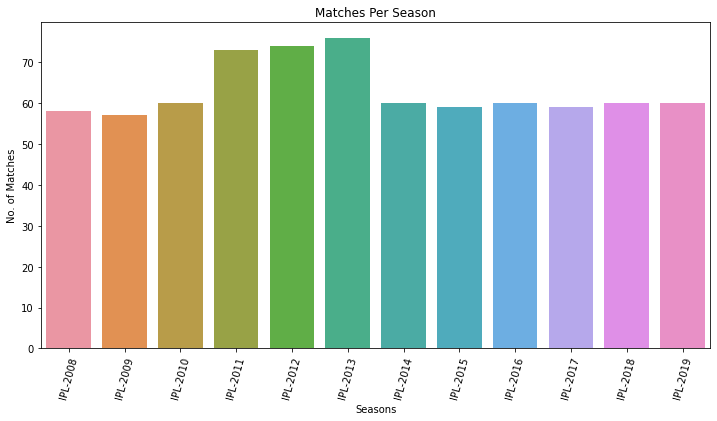

In [15]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Matches Per Season')
match_per_season_plot = sns.barplot(x = matches_per_season.index, y = matches_per_season)
match_per_season_plot.set(xlabel = 'Seasons', ylabel = 'No. of Matches');

The maximum matches played is in the year 2013 because there are 9 teams participated in this year.The least number of matches played is 57 in the year 2009.

The number of matches were in a boost during 2012-2014 , and went back to older number by 2016.

3.Match Winners based on Year?

In [16]:
teams_per_season = matches_df.groupby('Season')['winner'].value_counts()
teams_per_season

Season    winner                     
IPL-2008  Rajasthan Royals               13
          Kings XI Punjab                10
          Chennai Super Kings             9
          Delhi Daredevils                7
          Mumbai Indians                  7
                                         ..
IPL-2019  Kings XI Punjab                 6
          Kolkata Knight Riders           6
          Sunrisers Hyderabad             6
          Rajasthan Royals                5
          Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [17]:
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():
  print(items)
  extract_year = items[0][0].split('-')    
  if int(extract_year[1])==year:
    print(items[0][0])
    win_series = {
            'year': items[0][0],
            'team': items[0][1],
            'wins': items[1]}
    win_per_season_df = win_per_season_df.append(win_series,ignore_index=True)
    year = year + 1

(('IPL-2008', 'Rajasthan Royals'), 13)
IPL-2008
(('IPL-2008', 'Kings XI Punjab'), 10)
(('IPL-2008', 'Chennai Super Kings'), 9)
(('IPL-2008', 'Delhi Daredevils'), 7)
(('IPL-2008', 'Mumbai Indians'), 7)
(('IPL-2008', 'Kolkata Knight Riders'), 6)
(('IPL-2008', 'Royal Challengers Bangalore'), 4)
(('IPL-2008', 'Deccan Chargers'), 2)
(('IPL-2009', 'Delhi Daredevils'), 10)
IPL-2009
(('IPL-2009', 'Deccan Chargers'), 9)
(('IPL-2009', 'Royal Challengers Bangalore'), 9)
(('IPL-2009', 'Chennai Super Kings'), 8)
(('IPL-2009', 'Kings XI Punjab'), 7)
(('IPL-2009', 'Rajasthan Royals'), 6)
(('IPL-2009', 'Mumbai Indians'), 5)
(('IPL-2009', 'Kolkata Knight Riders'), 3)
(('IPL-2010', 'Mumbai Indians'), 11)
IPL-2010
(('IPL-2010', 'Chennai Super Kings'), 9)
(('IPL-2010', 'Deccan Chargers'), 8)
(('IPL-2010', 'Royal Challengers Bangalore'), 8)
(('IPL-2010', 'Delhi Daredevils'), 7)
(('IPL-2010', 'Kolkata Knight Riders'), 7)
(('IPL-2010', 'Rajasthan Royals'), 6)
(('IPL-2010', 'Kings XI Punjab'), 4)
(('IPL-2011'

In [18]:
win_per_season_df

,year,team,wins
0,IPL-2008,Rajasthan Royals,13
1,IPL-2009,Delhi Daredevils,10
2,IPL-2010,Mumbai Indians,11
3,IPL-2011,Chennai Super Kings,11
4,IPL-2012,Kolkata Knight Riders,12
5,IPL-2013,Mumbai Indians,13
6,IPL-2014,Kings XI Punjab,12
7,IPL-2015,Chennai Super Kings,10
8,IPL-2016,Sunrisers Hyderabad,11
9,IPL-2017,Mumbai Indians,12


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


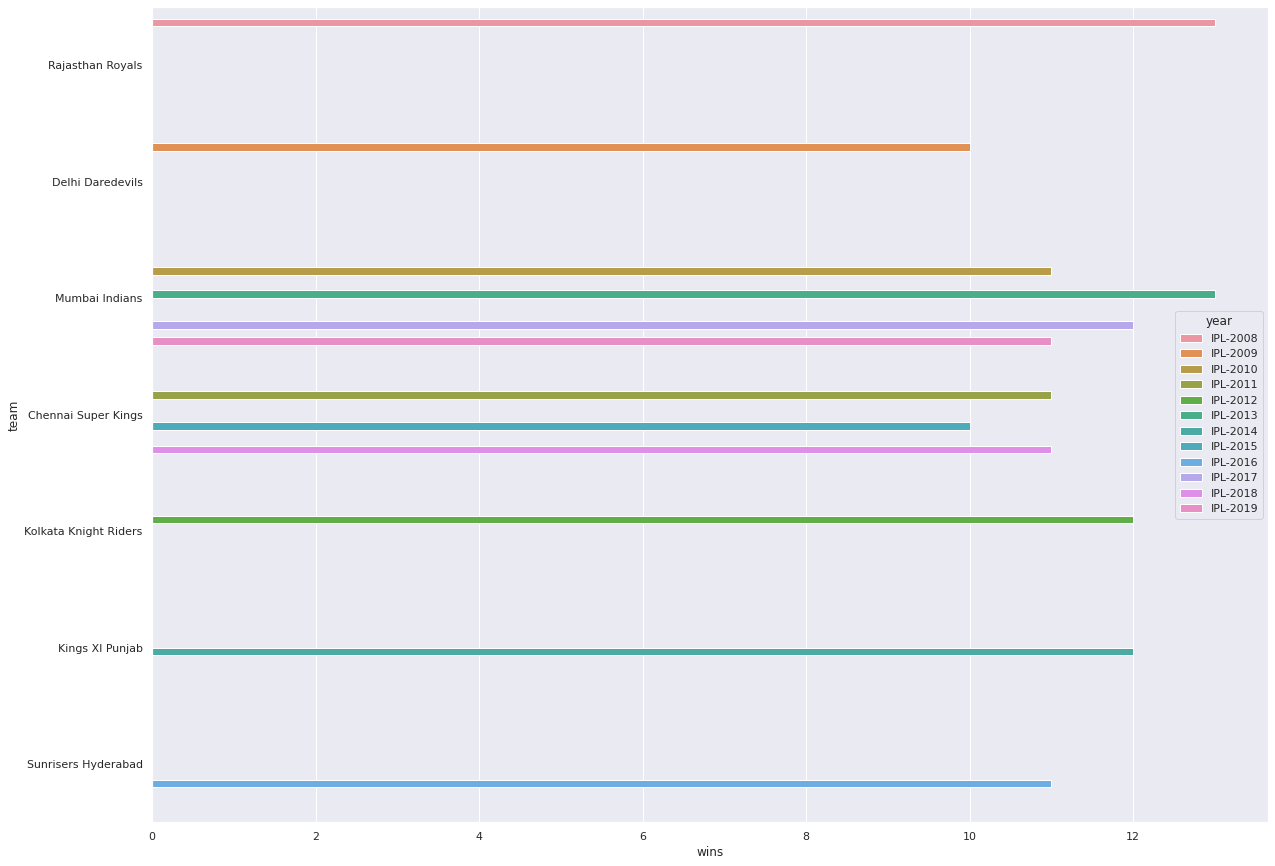

In [70]:
plt.figure(figsize=(20,15))
sns.barplot('wins', 'team', hue='year', data=win_per_season_df);

From the barplot, we can easily make inferences regarding the year in which a particular team has scored the maximum wins(and also the number of wins).

Observations:
Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019).

One better way to analyse winning team is to fond out the win percentage.

In [20]:
total_matches_played = (matches_df.team2.value_counts() + matches_df.team1.value_counts()).sort_values(ascending = False)
total_matches_played

Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Rising Pune Supergiant          16
Delhi Capitals                  16
Rising Pune Supergiants         14
Kochi Tuskers Kerala            14
dtype: int64

In [67]:
most_wins = matches_df.winner.value_counts()
most_wins

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [22]:
win_percentage = (most_wins / total_matches_played).sort_values(ascending = False) * 100
win_percentage

Rising Pune Supergiant         62.500000
Delhi Capitals                 62.500000
Chennai Super Kings            60.975610
Mumbai Indians                 58.288770
Sunrisers Hyderabad            53.703704
Kolkata Knight Riders          51.685393
Rajasthan Royals               51.020408
Royal Challengers Bangalore    46.666667
Kings XI Punjab                46.590909
Gujarat Lions                  43.333333
Kochi Tuskers Kerala           42.857143
Delhi Daredevils               41.614907
Deccan Chargers                38.666667
Rising Pune Supergiants        35.714286
Pune Warriors                  26.086957
dtype: float64

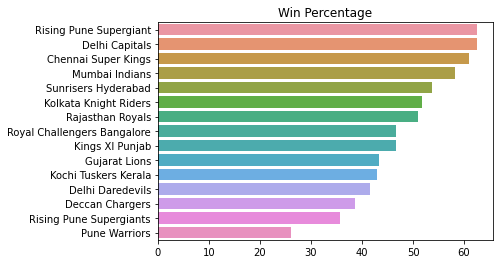

In [23]:
plt.title('Win Percentage')
win_percentage_plot = sns.barplot(y = win_percentage.index, x = win_percentage)
# total_matches_played_plot.set(ylabel = 'Teams', xlabel = 'Percentage')

Win percentage is highest for Rising Pune Supergiants.

Now finding the consistency of each team over the IPL years.

In [24]:
matches_won_each_season = pd.crosstab(matches_df['winner'], matches_df['Season'])

In [25]:
matches_won_each_season

Season,IPL-2008,IPL-2009,IPL-2010,IPL-2011,IPL-2012,IPL-2013,IPL-2014,IPL-2015,IPL-2016,IPL-2017,IPL-2018,IPL-2019
winner,,,,,,,,,,,,
Chennai Super Kings,9,8,9,11,10,12,10,10,0,0,11,10
Deccan Chargers,2,9,8,6,4,0,0,0,0,0,0,0
Delhi Capitals,0,0,0,0,0,0,0,0,0,0,0,10
Delhi Daredevils,7,10,7,4,11,3,2,5,7,6,5,0
Gujarat Lions,0,0,0,0,0,0,0,0,9,4,0,0
Kings XI Punjab,10,7,4,7,8,8,12,3,4,7,6,6
Kochi Tuskers Kerala,0,0,0,6,0,0,0,0,0,0,0,0
Kolkata Knight Riders,6,3,7,8,12,6,11,7,8,9,9,6
Mumbai Indians,7,5,11,10,10,13,7,10,7,12,6,11


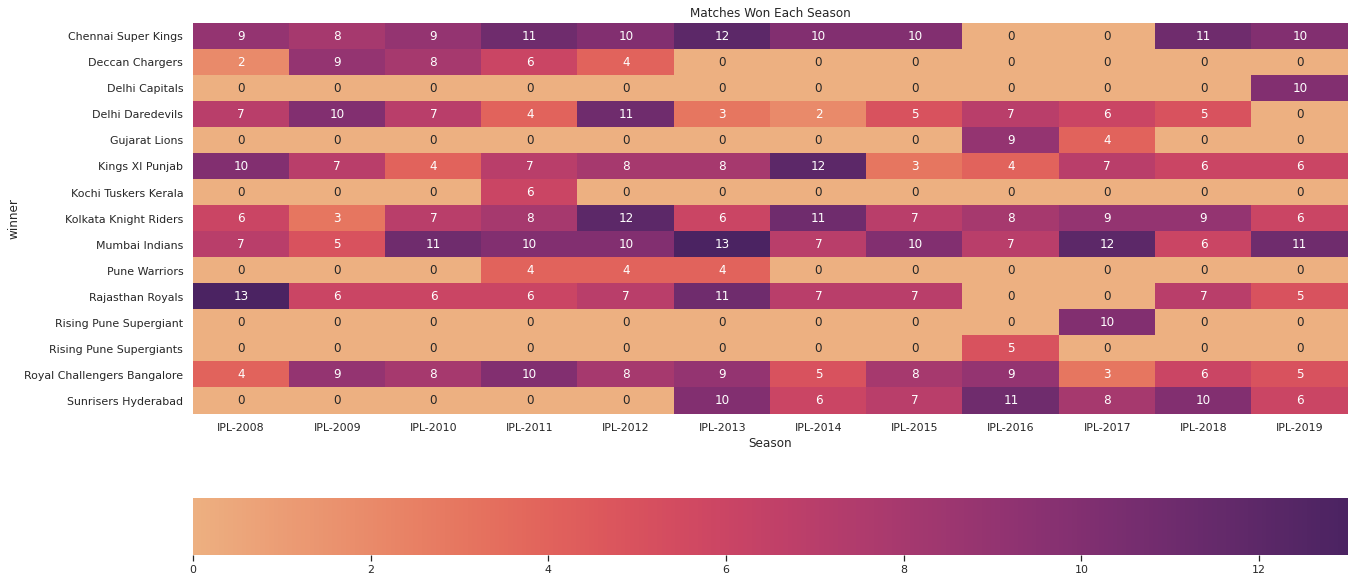

In [68]:
plt.xlabel('Seasons')
plt.ylabel('Teams')
plt.title('Matches Won Each Season')
sns.heatmap(matches_won_each_season, annot = True, cmap = 'flare', fmt = 'd', cbar_kws={"orientation": "horizontal"})

1.Clearly Mumbai Indians is the best team in the last season(2019) winning almost 70% of their matches.

2.Almost all the teams took a dip in winning percentage from last season.

3.Delhi Daredevils went through a revamp in 2018 and got rechristened as.

4.Delhi Capitals — that sure worked out for them in terms of winning percentage for the current season. But its too early to decide.

5.Rajasthan Royals started out as the best team in the league, but never replicated their initial success

In [27]:
venue_ser = matches_df['venue'].value_counts()

In [28]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

In [29]:
venue_df

,venue,matches
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


There are total 41 venues where matches are being played.

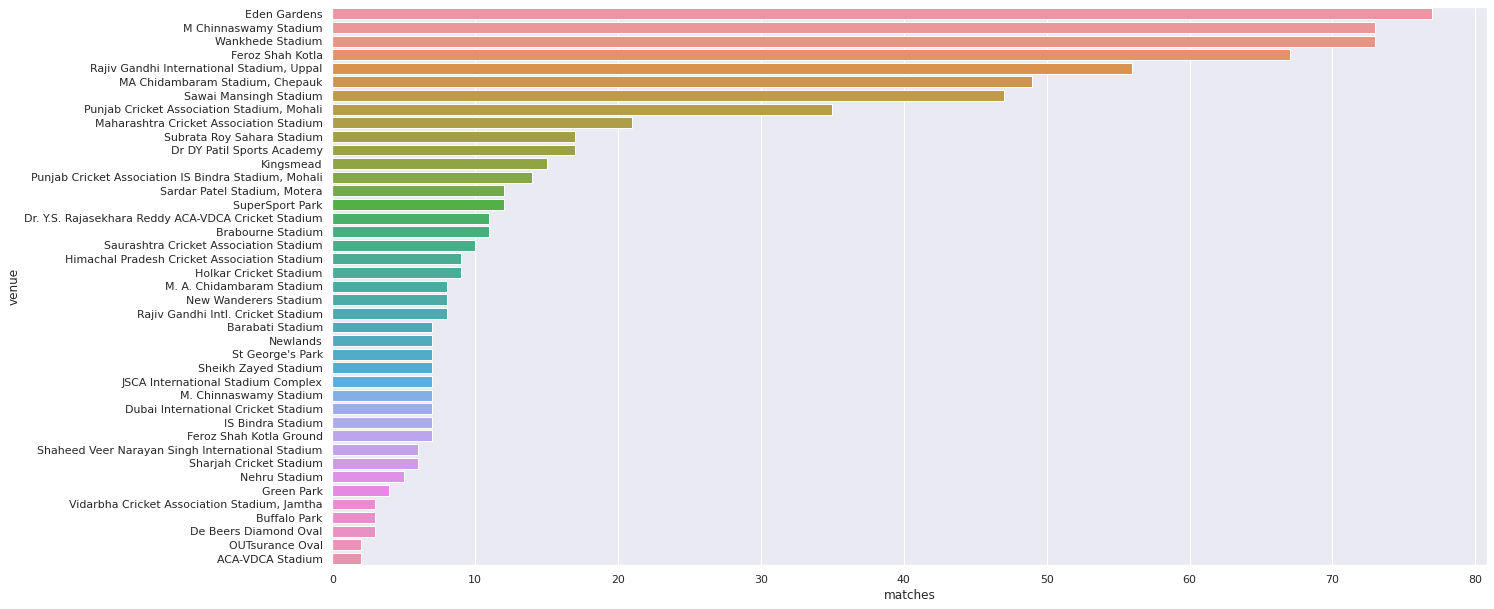

In [71]:

sns.barplot(x='matches', y='venue', data=venue_df);
sns.set(rc={'figure.figsize':(20.7,10.27)})

*Eden Gardens has hosted the maximum number of IPL matches.It is one of the oldest cricket stadiums and has the largest capacity.
It is the end destination for every cricket person.



4.The player who has won the player_of_match title on most occasions is the most valuable player.



In [31]:
man_of_the_match_ser = matches_df['player_of_match'].value_counts()
man_of_the_match_ser

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
                  ..
MJ Lumb            1
NV Ojha            1
HH Gibbs           1
R McLaren          1
Kuldeep Yadav      1
Name: player_of_match, Length: 226, dtype: int64

In [32]:
man_of_the_match_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in man_of_the_match_ser.iteritems():
    if count>10:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        man_of_the_match_df = man_of_the_match_df.append(temp_df2, ignore_index=True)
        count += 1

In [33]:
man_of_the_match_df

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,RG Sharma,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,AM Rahane,12


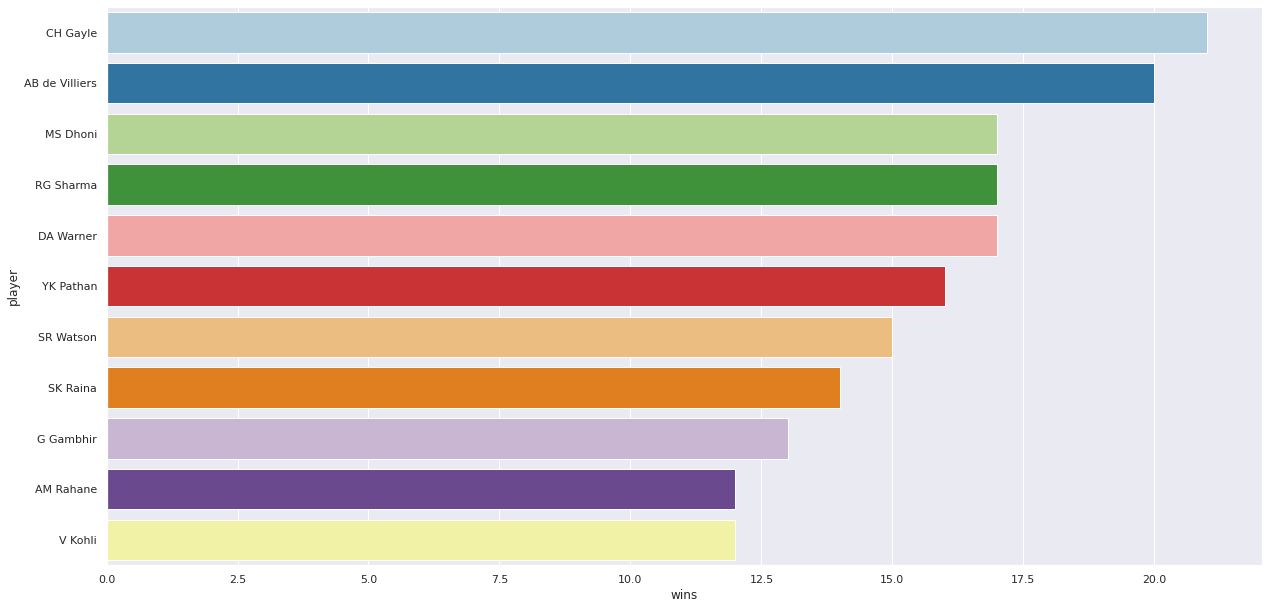

In [34]:
sns.barplot(x='wins', y='player', data=man_of_the_match_df, palette='Paired');

Cris Gayle is the player who won the most player of the match awards and hence is the most valuable player.



1.   Which team has won the toss maximum time?
2.   Does winning the toss give any advantage over the other team?




In [35]:
matches_df.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [36]:
toss_ser = matches_df['toss_winner'].value_counts()

In [37]:
toss_winner_df = pd.DataFrame(columns=['team', "wins"])
count = 0
for items in man_of_the_match_ser.iteritems():
    if count>10:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        man_of_the_match_df = man_of_the_match_df.append(temp_df2, ignore_index=True)
        count += 1

In [38]:
win_count = 0
for index, value in matches_df.iterrows():
    if(value['toss_winner']==value['winner']):
        # print(value['winner'])
        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')

The number of times the team winning toss have won: 393


In [39]:
probability = win_count/len(matches_df)
probability

0.5198412698412699

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


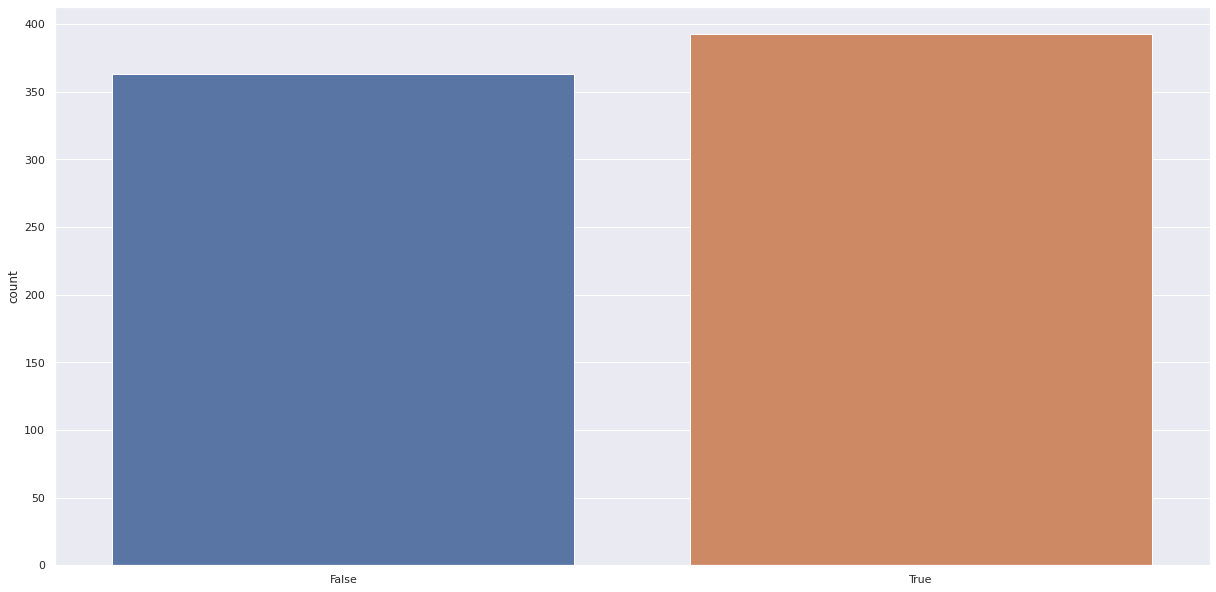

In [40]:
ss = matches_df['toss_winner'] == matches_df['winner']
sns.countplot(ss)


This implies that 51.9% of the times when a team won the toss, it had won the match as well.So, it shows that the toss winning has hardly any advantage over the other team.

In [41]:
win_by_field = 0
win_by_bat = 0
for index,value in matches_df.iterrows():
  if (value['toss_decision']=='field') and (value['toss_winner']==value['winner']):
    win_by_field +=1
  if (value['toss_decision']=='bat') and (value['toss_winner']==value['winner']):
    win_by_bat +=1

In [42]:
print(f'The number of times the team winning toss have won when chosen to field: {win_by_field}')
print(f'The number of times the team winning toss have won when chosen to bat: {win_by_bat}')

The number of times the team winning toss have won when chosen to field: 259
The number of times the team winning toss have won when chosen to bat: 134


In [43]:
prob_of_winning_when_toss_won_and_chose_field = win_by_field/len(matches_df)
prob_of_winning_when_toss_won_and_chose_bat = win_by_bat/len(matches_df)

In [44]:
prob_of_winning_when_toss_won_and_chose_field


0.3425925925925926

In [45]:
prob_of_winning_when_toss_won_and_chose_bat

0.17724867724867724



*   From the above operation we can conclude that, whenever a team has won the toss,and had chosen to field ,they had an edge over the team which took the other decision



* Which umpire has officiated the most number of IPL matches on-field?  

In [46]:
umpire1_ser = matches_df['umpire1'].value_counts()
umpire2_ser = matches_df['umpire2'].value_counts()

In [47]:
umpires_df = pd.concat([umpire1_ser, umpire2_ser], axis=1)
umpires_df

,umpire1,umpire2
HDPK Dharmasena,73.0,14.0
Asad Rauf,51.0,NaN
S Ravi,49.0,57.0
AK Chaudhary,43.0,15.0
Aleem Dar,38.0,NaN
...,...,...
K Srinivasan,NaN,3.0
KN Anantapadmanabhan,NaN,3.0
SD Ranade,NaN,2.0
Nand Kishore,NaN,1.0


In [48]:
umpire_ser = umpires_df.sum(axis=1)

umpire_df = pd.DataFrame(columns=["umpire", "matches"])

for items in umpire_ser.iteritems():
    # print(items)
    temp_df1 = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpire_df= umpire_df.append(temp_df1, ignore_index=True) 

In [49]:
umpire_df.sort_values('matches', ascending=False).head()

,umpire,matches
2,S Ravi,106.0
0,HDPK Dharmasena,87.0
11,C Shamshuddin,73.0
3,AK Chaudhary,58.0
57,SJA Taufel,55.0




* S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field, followed by HDPK Dharmasena.
* Sundaram Ravi (born 22 April 1966) is an Indian cricket umpire from who was a member of the ICC Elite Panel of Umpires between 2015 and 2019. 



In [50]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

In [51]:
highest_wins_by_runs_df = matches_df[matches_df.win_by_runs != 0].sort_values('win_by_runs', ascending = False)
highest_wins_by_runs_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,IPL-2017,Delhi,06-05-2017,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
619,620,IPL-2016,Bangalore,14-05-2016,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma,NaN
59,60,IPL-2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
556,557,IPL-2015,Bangalore,06-05-2015,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni,NaN
410,411,IPL-2013,Bangalore,23-04-2013,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bangalore,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,IPL-2017,Hyderabad,21-05-2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN
614,615,IPL-2016,Chandigarh,09-05-2016,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,1,0,SR Watson,"Punjab Cricket Association IS Bindra Stadium, ...",AK Chaudhary,HDPK Dharmasena,NaN
598,599,IPL-2016,Delhi,27-04-2016,Gujarat Lions,Delhi Daredevils,Delhi Daredevils,field,normal,0,Gujarat Lions,1,0,CH Morris,Feroz Shah Kotla,M Erasmus,S Ravi,NaN
163,164,IPL-2009,Johannesburg,17-05-2009,Kings XI Punjab,Deccan Chargers,Deccan Chargers,field,normal,0,Kings XI Punjab,1,0,Yuvraj Singh,New Wanderers Stadium,S Ravi,RB Tiffin,NaN


TypeError: ignored

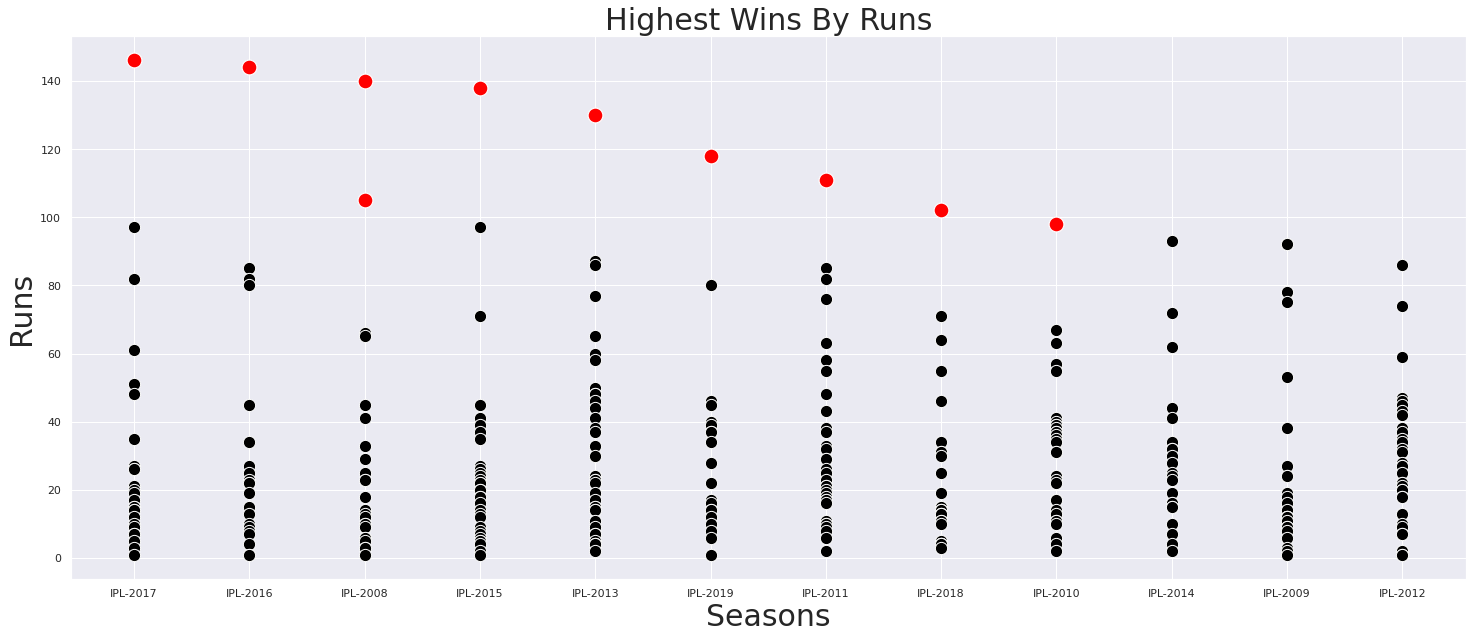

In [52]:
plt.figure(figsize=(25, 10))
plt.xlabel('Seasons',size=30)
plt.ylabel('Runs',size=30)
plt.title('Highest Wins By Runs', size = 30)
sns.scatterplot(x = 'Season',y =  'win_by_runs', data = highest_wins_by_runs_df, s =150, color = 'black');
sns.scatterplot(x = 'Season',y =  'win_by_runs', data = highest_wins_by_runs_df.head(10), s =220, color = 'red');
for i in range(highest_wins_by_runs_df.head(10).shape[0]):
    plt.annotate(highest_wins_by_runs_df.winner.tolist()[i], (highest_wins_by_runs_df.Season.tolist()[i]+1, highest_wins_by_runs_df.win_by_runs.tolist()[i] - 1) , size = 20)

In [ ]:
Mumbai Indians won by maximum runs.

In [ ]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax()]['winner']

KKR won by max wickets.

In [ ]:
working_directory = '/content/drive/My Drive/AlmaBetter/CohortAravali/Cohort Aravali/Module 2/Capstone-1/'
Players_df = pd.read_excel(working_directory + 'Players.xlsx')

In [ ]:
Players_df.head()

In [ ]:
Players_df.tail()

In [ ]:
Players_df['Player_Name'].unique()

In [ ]:
print(Players_df.loc[Players_df['Player_Name'] == 'CH Gayle'])

From above two operations we can conclude that Cris Gayle who has been Player of the match for most of the matches is Left handed ,age is 41 years old and hails from West Indies.



In [ ]:
working_directory = '/content/drive/My Drive/AlmaBetter/CohortAravali/Cohort Aravali/Module 2/Capstone-1/'
most_runs_average_strikerate_df = pd.read_csv(working_directory + 'most_runs_average_strikerate.csv')

In [ ]:
most_runs_average_strikerate_df.head()

In [ ]:
most_runs_average_strikerate_df.describe()

In [ ]:
most_runs_average_strikerate_df.info()

In [ ]:
mras = most_runs_average_strikerate_df[['batsman','average']].groupby('batsman').sum().sort_values(by = 'average',ascending = False)
mras.iloc[:6]

Above are the batsman with highest average.

In [ ]:
most_runs_average_strikerate_df.sort_values(['strikerate'],ascending=False).head()

These are the top 5 batsman with best strike rate.

In [ ]:
data_df = most_runs_average_strikerate_df[['batsman','total_runs','out','numberofballs','average','strikerate']]

In [ ]:
corr_df = data_df.corr()
corr_df

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df)

In [ ]:
working_directory = '/content/drive/My Drive/AlmaBetter/CohortAravali/Cohort Aravali/Module 2/Capstone-1/'
deliveries_df = pd.read_csv(working_directory + 'deliveries.csv')

In [ ]:
deliveries_df.head()

In [ ]:
deliveries_df.info()

In [ ]:
deliveries_df.describe()

In [ ]:
batsmen_score = pd.DataFrame(deliveries_df.groupby(['match_id','batsman']).sum()['batsman_runs'])
batsmen_score.head()

In [ ]:
plt.rcParams['figure.figsize'] = 10,5
batsmen_score.plot(kind = 'hist',fontsize = 20)
plt.xlabel('Runs Scored',fontsize = 20)
plt.ylabel('Number of Times',fontsize = 20)
plt.title('Histogram for Runs Scored',fontsize = 20)
plt.show()

In [ ]:
Batsman_score=deliveries_df.groupby('batsman')["batsman_runs"].agg(sum).reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)

In [ ]:
Top_batsman_score= Batsman_score.iloc[:10]

In [ ]:
Top_batsman_score



*   Virat Kohli is the batsman with highest runs.


In [ ]:
Batsman_ball_faced=deliveries_df.groupby(['batsman'])["ball"].count().reset_index().sort_values(by="ball",ascending=False).reset_index(drop=True)
Batsman_ball_faced_Top=Batsman_ball_faced.iloc[:11]
Batsman_ball_faced_Top

* Virat Kohli has faced maximum balls.



In [ ]:
# aggregatedata = pd.merge(matches,deliveries, left_on = 'id',right_on = 'match_id')
# aggregatedata.columns

In [ ]:
# batsmen_strikerate_season = pd.DataFrame(aggregatedata.groupby(['season','batsman']).agg({'batsman_runs' : 'sum','ball' : 'count'}))
# batsmen_strikerate_season['Strike Rate'] = batsmen_strikerate_season['batsman_runs']/batsmen_strikerate_season['ball']*100
# batsmen_strikerate_season = batsmen_strikerate_season.sort_values(by =['season','Strike Rate'] , ascending = False)
# batsmen_strikerate_season.reset_index(inplace = True)
# batsmen_strikerate_season[batsmen_strikerate_season['batsman_runs'] > 300].head()

In [54]:
working_directory = '/content/drive/My Drive/AlmaBetter/CohortAravali/Cohort Aravali/Module 2/Capstone-1/'
deliveries_df = pd.read_csv(working_directory + 'deliveries.csv')

In [ ]:
deliveries_df.head()

Which bowler has given max wide runs?

In [ ]:
deliveries_df[['bowler','wide_runs']].groupby('bowler').sum().sort_values(by="wide_runs",ascending=False)

SL Malinga is the bowler who gave maximum wide runs during the IPLs.

In [ ]:
deliveries_df[deliveries_df['is_super_over']==1]

In [ ]:
super_over_df = pd.DataFrame(deliveries_df,columns= ['batting_team','is_super_over'])
super_over_df.head()

In [ ]:
gkk= super_over_df[super_over_df['is_super_over']==1]

In [ ]:
gkk['batting_team'].value_counts()

1.By the above observation ,we can conclude that , all above teams have taken super over.
2. Rajasthan Royals have taken 14 super overs followed by Kolkata Knight Riders.




In [59]:
deliveries_df[['batting_team','batsman','batsman_runs']].groupby(['batting_team','batsman','batsman_runs']).sum().sort_values(by='batsman_runs',ascending=False)

Empty DataFrame
Columns: []
Index: [(Kolkata Knight Riders, AD Russell, 7), (Chennai Super Kings, DJ Bravo, 7), (Kolkata Knight Riders, CA Lynn, 7), (Royal Challengers Bangalore, BB McCullum, 7), (Royal Challengers Bangalore, C de Grandhomme, 7), (Sunrisers Hyderabad, Mohammad Nabi, 7), (Chennai Super Kings, MS Dhoni, 7), (Mumbai Indians, KA Pollard, 7), (Mumbai Indians, RG Sharma, 7), (Deccan Chargers, LPC Silva, 6), (Mumbai Indians, TL Suman, 6), (Delhi Daredevils, KD Karthik, 6), (Mumbai Indians, TG Southee, 6), (Kolkata Knight Riders, C de Grandhomme, 6), (Mumbai Indians, ST Jayasuriya, 6), (Royal Challengers Bangalore, S Hetmyer, 6), (Delhi Daredevils, K Rabada, 6), (Deccan Chargers, MD Mishra, 6), (Kolkata Knight Riders, CA Lynn, 6), (Sunrisers Hyderabad, NV Ojha, 6), (Mumbai Indians, SS Tiwary, 6), (Deccan Chargers, KC Sangakkara, 6), (Kolkata Knight Riders, BJ Hodge, 6), (Royal Challengers Bangalore, LRPL Taylor, 6), (Mumbai Indians, Yuvraj Singh, 6), (Delhi Daredevils, KP Pietersen, 6), (Royal Challengers Bangalore, LA Pomersbach, 6), (Sunrisers Hyderabad, DW Steyn, 6), (Mumbai Indians, Z Khan, 6), (Deccan Chargers, JP Duminy, 6), (Delhi Daredevils, KM Jadhav, 6), (Kolkata Knight Riders, B Lee, 6), (Deccan Chargers, MR Marsh, 6), (Mumbai Indians, YV Takawale, 6), (Royal Challengers Bangalore, S Rana, 6), (Kolkata Knight Riders, BB McCullum, 6), (Delhi Daredevils, KK Nair, 6), (Kolkata Knight Riders, BJ Haddin, 6), (Mumbai Indians, UBT Chand, 6), (Royal Challengers Bangalore, M Ali, 6), (Sunrisers Hyderabad, Yuvraj Singh, 6), (Mumbai Indians, SR Tendulkar, 6), (Sunrisers Hyderabad, NLTC Perera, 6), (Kolkata Knight Riders, DJ Hussey, 6), (Mumbai Indians, RR Raje, 6), (Deccan Chargers, R Sharma, 6), (Kolkata Knight Riders, EJG Morgan, 6), (Mumbai Indians, RJ Peterson, 6), (Delhi Daredevils, JA Morkel, 6), (Mumbai Indians, RG Sharma, 6), (Deccan Chargers, RG Sharma, 6), (Kolkata Knight Riders, G Gambhir, 6), (Kolkata Knight Riders, I Sharma, 6), (Mumbai Indians, RE Levi, 6), (Sunrisers Hyderabad, GH Vihari, 6), (Delhi Daredevils, J Botha, 6), (Deccan Chargers, RJ Harris, 6), (Kolkata Knight Riders, J Botha, 6), (Mumbai Indians, RT Ponting, 6), (Delhi Daredevils, JDS Neesham, 6), (Kolkata Knight Riders, AD Russell, 6), (Mumbai Indians, RV Uthappa, 6), (Mumbai Indians, SM Pollock, 6), (Kolkata Knight Riders, CA Pujara, 6), (Mumbai Indians, SL Malinga, 6), (Sunrisers Hyderabad, EJG Morgan, 6), (Mumbai Indians, SD Lad, 6), (Delhi Daredevils, JP Duminy, 6), (Deccan Chargers, PA Patel, 6), (Kolkata Knight Riders, CH Gayle, 6), (Mumbai Indians, SD Chitnis, 6), (Royal Challengers Bangalore, S Dube, 6), (Kolkata Knight Riders, CR Woakes, 6), (Deccan Chargers, PA Reddy, 6), (Delhi Daredevils, JJ Roy, 6), (Mumbai Indians, S Dhawan, 6), (Kolkata Knight Riders, DB Das, 6), (Delhi Daredevils, JR Hopes, 6), (Pune Warriors, AC Thomas, 6), (Kolkata Knight Riders, AD Mathews, 6), (Deccan Chargers, CL White, 6), (Pune Warriors, R Sharma, 6), (Delhi Daredevils, MF Maharoof, 6), (Pune Warriors, NL McCullum, 6), (Kochi Tuskers Kerala, B Akhil, 6), (Pune Warriors, MR Marsh, 6), (Royal Challengers Bangalore, SR Watson, 6), (Deccan Chargers, DB Ravi Teja, 6), (Pune Warriors, MN Samuels, 6), (Kochi Tuskers Kerala, BB McCullum, 6), (Pune Warriors, MK Pandey, 6), (Delhi Daredevils, MC Juneja, 6), (Deccan Chargers, DJ Harris, 6), (Kochi Tuskers Kerala, BJ Hodge, 6), (Kochi Tuskers Kerala, DPMD Jayawardene, 6), (Royal Challengers Bangalore, SP Goswami, 6), (Sunrisers Hyderabad, DJ Hooda, 6), (Kings XI Punjab, Yuvraj Singh, 6), (Royal Challengers Bangalore, M Vohra, 6), (Pune Warriors, RV Uthappa, 6), ...]

[4110 rows x 0 columns]

In [58]:
Batsman_fours=deliveries_df.groupby(['batsman'])["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)

In [60]:
Batsman_fours.columns = ["batsman", "No. of 4s"]
Batsman_fours.iloc[:10]

,batsman,No. of 4s
0,S Dhawan,526
1,SK Raina,495
2,G Gambhir,492
3,V Kohli,482
4,DA Warner,459
5,RV Uthappa,436
6,RG Sharma,431
7,AM Rahane,405
8,CH Gayle,376
9,PA Patel,366


S Dhawan has scored maximum boundaries followed by SK RAina & G Gambhir.

In [61]:
Batsman_sixes=deliveries_df.groupby("batsman")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)
Batsman_sixes.columns= ["batsman","No_of_6s"]
Batsman_sixes.iloc[:20,:]

,batsman,No_of_6s
0,CH Gayle,327
1,AB de Villiers,214
2,MS Dhoni,207
3,SK Raina,195
4,RG Sharma,194
5,V Kohli,191
6,DA Warner,181
7,SR Watson,177
8,KA Pollard,175
9,YK Pathan,161


Maximum 6's were hit by, Cris Gayle and it is evident because he has also been the player of the match maximum times during the IPLs.

In [ ]:
Batsman_Score_by_Match= deliveries_df[["match_id","batsman","batsman_runs"]]
Batsman_Score_by_Match=Batsman_Score_by_Match.groupby(["match_id","batsman"]).sum()
Batsman_with_centuries=Batsman_Score_by_Match[Batsman_Score_by_Match["batsman_runs"]>=100].reset_index()
Batsman_with_centuries=Batsman_with_centuries.groupby("batsman")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
Batsman_with_centuries.columns=["batsman","No_of_centuries"]
Batsman_with_centuries

CH Gayke has made maximum centuries during the IPL

In [ ]:
Batsman_with_Half_centuries=Batsman_Score_by_Match[Batsman_Score_by_Match["batsman_runs"]>=50].reset_index()
Batsman_with_Half_centuries=Batsman_with_Half_centuries.groupby("batsman")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
Batsman_with_Half_centuries_top=Batsman_with_Half_centuries[Batsman_with_Half_centuries["match_id"]>=10]
Batsman_with_Half_centuries_top.columns = ["batsman","No_of_half_centuries"]
Batsman_with_Half_centuries_top

DA Warner has made max half centuries during the IPL.

In [ ]:
Bowler_wicket = deliveries_df[deliveries_df["dismissal_kind"] != "run out"]
Bowler_wicket= Bowler_wicket[["bowler","player_dismissed"]]
Bowler_wicket = Bowler_wicket.dropna()
Bowler_wicket= Bowler_wicket.groupby("bowler")["player_dismissed"].count().reset_index().sort_values(by="player_dismissed",ascending=False).reset_index(drop=True)
Bowler_wicket.columns=["bowler","Wickets"]
Bowler_wicket.iloc[:6]

Top 6 bowlers who took max wickets are found above.

In [56]:
Batsman_dotballs=deliveries_df[deliveries_df["extra_runs"]==0].groupby(['batsman'])["batsman_runs"].agg(lambda x: (x==0).sum()).reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)
# here the dot ball for a batsman will be if it is a legal delivery and batsman didn't score a run on it
Batsman_dotballs.columns = ["batsman","No_of_Balls"]
Batsman_dotballs.iloc[:6]

,batsman,No_of_Balls
0,V Kohli,1369
1,S Dhawan,1319
2,RG Sharma,1291
3,CH Gayle,1236
4,RV Uthappa,1223
5,SK Raina,1221


In [ ]:
The Batsman who have faced more balls are on the top of dot balls also.

In [63]:
working_directory = '/content/drive/My Drive/AlmaBetter/CohortAravali/Cohort Aravali/Module 2/Capstone-1/'
teamwise_home_and_away_df = pd.read_csv(working_directory + 'teamwise_home_and_away.csv')

In [64]:
teamwise_home_and_away_df.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222


In [65]:
teamwise_home_and_away_df.describe()

,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,23.928571,29.428571,53.500000,53.500000,41.737663,55.574283
std,18.685512,20.816836,35.821674,35.883894,14.095272,13.669679
min,1.000000,4.000000,6.000000,7.000000,7.142857,23.076923
25%,5.250000,8.000000,15.500000,18.500000,36.282631,51.625387
50%,27.000000,35.000000,65.000000,60.000000,41.809353,58.401163
75%,34.750000,48.250000,84.500000,85.750000,49.404762,62.430556
max,58.000000,58.000000,101.000000,95.000000,62.500000,75.000000


Away win percentage is more than home win percenatage.


In [ ]:
home_wins = teamwise_home_and_away_df[['team','home_wins']].groupby('team').sum().sort_values(by="home_wins",ascending=False)
home_wins

Mumbai Indians had maximum home_wins.

In [ ]:
home_matches = teamwise_home_and_away_df[['team','home_matches']].groupby('team').sum().sort_values(by="home_matches",ascending=False)
home_matches

In [ ]:
away_wins = teamwise_home_and_away_df[['team','away_wins']].groupby('team').sum().sort_values(by="away_wins",ascending=False)
away_wins

Max away wins were for Kolkata Knight Riders.

In [ ]:
away_matches = teamwise_home_and_away_df[['team','away_matches']].groupby('team').sum().sort_values(by="away_matches",ascending=False)
away_matches